In [31]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt

In [32]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
data = pd.read_csv(url, header=None, names=column_names)

In [33]:
X = data[['DiabetesPedigreeFunction']].values
y = data['Outcome'].values

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

In [36]:
print("Regressao Logistica:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_logistic):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_logistic):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_logistic):.2f}")

Regressao Logistica:
Accuracy: 0.66
Precision: 0.71
Recall: 0.09
F1-Score: 0.16


In [37]:
nn_model = Sequential([
    Dense(10, activation='relu', input_shape=(1,)),
    Dense(1, activation='sigmoid')
])
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/home/peter/Code/6per/Regressao-simples-e-logistica/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
nn_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

Epoch 1/50


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6394 - loss: 0.6865
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6752 - loss: 0.6685
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6487 - loss: 0.6662
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6483 - loss: 0.6644
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6456 - loss: 0.6602
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6745 - loss: 0.6474
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6282 - loss: 0.6644
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6981 - loss: 0.6288
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6516 - loss: 0.6525
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6707 - loss: 0.6407
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6795 - loss: 0.6346
Epoch 12/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6300 - loss: 0.6602


In [39]:
y_pred_nn = nn_model.predict(X_test).round()
print("Rede neural:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nn):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_nn):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_nn):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_nn):.2f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Rede neural:
Accuracy: 0.66
Precision: 1.00
Recall: 0.05
F1-Score: 0.10


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


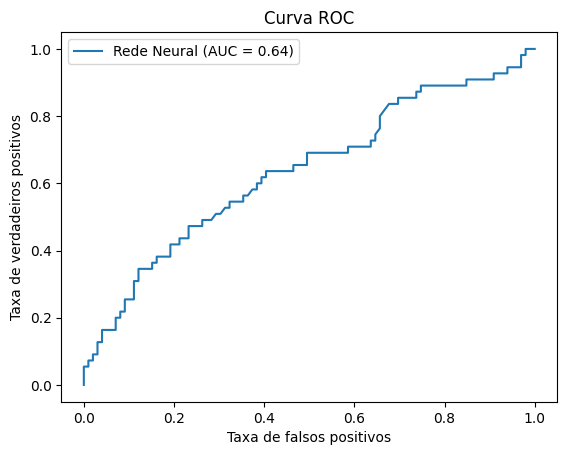

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, nn_model.predict(X_test))
plt.plot(fpr, tpr, label="Rede Neural (AUC = {:.2f})".format(roc_auc_score(y_test, nn_model.predict(X_test))))
plt.xlabel('Taxa de falsos positivos')
plt.ylabel('Taxa de verdadeiros positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()